<a href="https://colab.research.google.com/github/AFBA1993/Projects/blob/main/Insights/BusinessInsightsIfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

In [71]:
url = ('https://raw.githubusercontent.com/ifood/'
        +'ifood-data-business-analyst-test/master/ml_project1_data.csv')

In [72]:
url_data = requests.get(url).content
raw_data = pd.read_csv(io.StringIO(url_data.decode('utf-8')))

In [73]:
raw_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
raw_data.shape

(2240, 29)

In [75]:
raw_data.ID.value_counts

<bound method IndexOpsMixin.value_counts of 0        5524
1        2174
2        4141
3        6182
4        5324
        ...  
2235    10870
2236     4001
2237     7270
2238     8235
2239     9405
Name: ID, Length: 2240, dtype: int64>

In [76]:
raw_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [77]:
raw_data['Age'] = 2022 - raw_data.Year_Birth

In [78]:
raw_data.drop('Year_Birth', axis = 'columns',  inplace = True)

In [79]:
raw_data.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000


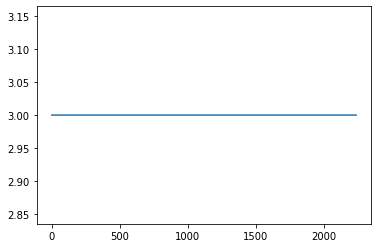

In [80]:
raw_data.Z_CostContact.plot()

There is no variance in the 'Z_CostContact', therefore, it can be removed

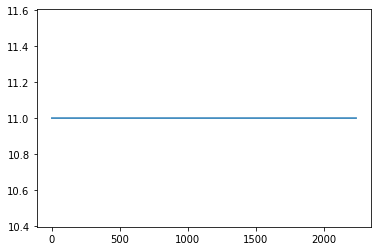

In [81]:
raw_data.Z_Revenue.plot()

There is no variance in the 'Z_Revenue', therefore, it can be removed

In [82]:
raw_data.drop('Z_Revenue', axis = 'columns', inplace = True)

In [83]:
raw_data.drop('Z_CostContact', axis = 'columns', inplace = True)

In [84]:
age_in = raw_data.loc[(raw_data['Age'])<95]
age_in.Age.mean()

53.098345999105945

In [86]:
raw_data.loc[(raw_data['Age'])>95] 

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,7829,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,2,5,0,0,0,0,0,1,0,122
239,11004,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,2,4,0,0,0,0,0,0,0,129
339,1150,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,4,1,0,0,1,0,0,0,0,123


In [87]:
raw_data.Age.loc[(raw_data['Age'])>95] = age_in.Age.mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
Campaign1_data = raw_data.loc[(raw_data['AcceptedCmp1'])==1]
Campaign2_data = raw_data.loc[(raw_data['AcceptedCmp2'])==1]
Campaign3_data = raw_data.loc[(raw_data['AcceptedCmp3'])==1]
Campaign4_data = raw_data.loc[(raw_data['AcceptedCmp4'])==1]
Campaign5_data = raw_data.loc[(raw_data['AcceptedCmp5'])==1]

In [47]:
per_CMP1 = len(Campaign1_data)/len(raw_data)*100
per_CMP2 = len(Campaign2_data)/len(raw_data)*100
per_CMP3 = len(Campaign3_data)/len(raw_data)*100
per_CMP4 = len(Campaign4_data)/len(raw_data)*100
per_CMP5 = len(Campaign5_data)/len(raw_data)*100

In [48]:
Total_per_CMP = per_CMP1+per_CMP2+per_CMP3+per_CMP4+per_CMP5
Total_per_CMP

29.776785714285715

Campaigns bad oriented they are only capting 30% of the users.

In [90]:
data = raw_data

In [91]:
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'ID'], axis = 1, inplace = True)

In [93]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Age'],
      dtype='object')